<a href="https://colab.research.google.com/github/shirsh12/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
#loading data set
path= "/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Team Capstone Project - Cardiovascular Risk Prediction/data_cardiovascular_risk.csv"

main_data = pd.read_csv(path)

In [ ]:
#view
main_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0



The dataset is from an ongoing cardiovascular studyon residents of the town of Framingham,Massachusetts. The classification goal is to predictwhether the patient has a 10-year risk offuture coronary heart disease (CHD). The dataset providesthe patients’ information. It includesover 4,000 records and 15 attributes.VariablesEach attribute is a potential risk factor. There are both demographic, behavioral, and medical riskfactors.
#**Data DescriptionDemographic:**

*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although therecorded ages have been truncated towhole numbers, the concept of age is continuous)Behavioral
* is_smoking: whether or not the patient is a currentsmoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that theperson smoked on average in one day.(can beconsidered continuous as one can have any number ofcigarettes, even half a cigarette.)Medical( history)
* BP Meds: whether or not the patient was on bloodpressure medication (Nominal)
* Prevalent Stroke: whether or not the patient hadpreviously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive(Nominal)
* Diabetes: whether or not the patient had diabetes(Nominal)Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medicalresearch, variables such as heart rate though infact discrete, yet are considered continuous becauseof large number of possible values.)
* Glucose: glucose level (Continuous)Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary:“1”, means “Yes”, “0” means “No”) -DV


In [ ]:
#descriptive stats
main_data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## Goal : **Given this problem statement we have to build a Predictive Model which will give early detections of heart disease**

## For this problem our target variable : TenYearCHD

In [ ]:
round(main_data.value_counts("TenYearCHD")/main_data.shape[0],2)

TenYearCHD
0    0.85
1    0.15
dtype: float64

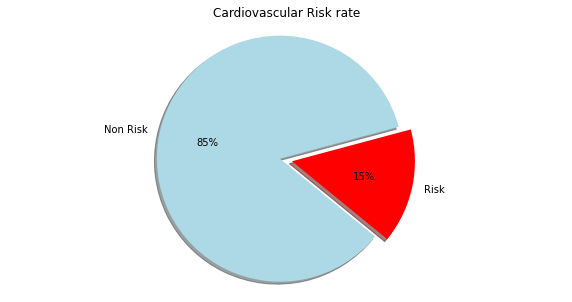

In [ ]:
labels = 'Non Risk',"Risk"
my_colors = ['lightblue','red']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(main_data['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()



## Here we see there is a huge class imbalancedment.

##**Renaming the Target variable "TenYearCHD" as RISK** 

In [ ]:
main_data.rename(columns={"TenYearCHD":"RISK"},inplace=True)

In [ ]:
main_data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'RISK'],
      dtype='object')

In [ ]:
#Sanity check
round(main_data.isnull().sum()/main_data.shape[0]*100,2).sort_values(ascending=False).head()

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
dtype: float64

## Except the feature name glucose all other features in the dataset have less than 5% null values.

In [ ]:
#Dropping redundant variable "id"
main_data.drop("id",axis=1,inplace=True)

In [ ]:
main_data.shape

(3390, 16)

## Following Dataset has 3390 records and **15 Features** which are responsible for "Cardiovascular Risk".

#**Project Work flow**
---

1. Splitting to Train,Validation and Test sets to avoid Data bleeding.

2. Simultaneously Data Cleaning of Train and Test sets

3. EDA on features

4. Feature cleaning if needed

5. Solving Class Imbalancedment problem

6. Base Model and Candidate Models

7. There Hypertuning

8. Bias-Variance tradeoff 

9. Applying Nueral network 

10. Creating Voting Classifier

11. Final Predictions
--- 





##**1. To avoid bleeding of data, splitting the whole Dataset in Train , Validation and Test sets.**

We want to (approximately) keep the proportion of Target values through the training and test sets, Hence we will pass stratify=Target. This will enable stratified splitting:

In [ ]:
X= main_data.drop('RISK',axis=1)
Y= main_data["RISK"]

In [ ]:
len(X),len(Y)

(3390, 3390)

In [ ]:
from sklearn.model_selection import train_test_split
train_X ,final_testX,train_Y, final_testY = train_test_split(X,Y,test_size=0.2 , stratify=Y,random_state=1) 

print("Train set",":",train_X.shape[0])


print("Test set",":",final_testX.shape[0])

Train set : 2712
Test set : 678


### Combining the Train features and target set for ease.

In [ ]:
train_df= pd.concat([train_X,train_Y],axis=1)

In [ ]:
print(train_df.shape)
train_df.head()

(2712, 16)


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RISK
542,49,2.0,F,YES,20.0,0.0,0,0,0,229.0,118.5,76.5,21.42,76.0,NaN,0
2726,51,3.0,M,NO,0.0,0.0,0,0,0,215.0,147.0,96.0,28.59,65.0,100.0,0
3067,57,1.0,F,YES,1.0,0.0,0,1,0,254.0,146.5,81.0,41.61,72.0,85.0,1
204,59,4.0,F,NO,0.0,1.0,0,1,0,282.0,135.0,87.0,28.96,72.0,NaN,0
329,52,1.0,F,NO,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0


In [ ]:
final_testX.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1532,42,2.0,M,YES,30.0,0.0,0,0,0,256.0,111.0,62.0,21.67,74.0,74.0
818,60,1.0,M,YES,9.0,0.0,0,0,0,166.0,141.0,81.0,19.42,67.0,101.0
2830,55,2.0,M,NO,0.0,0.0,0,0,0,309.0,126.0,88.0,26.77,68.0,NaN
1202,45,4.0,M,YES,5.0,0.0,0,1,0,227.0,166.0,102.0,29.32,58.0,85.0
1053,58,3.0,F,NO,0.0,0.0,0,1,0,287.0,144.0,84.0,21.81,69.0,68.0


In [ ]:
print(train_df.value_counts("RISK")/train_df.shape[0])

print(final_testY.value_counts()/final_testY.shape[0])

RISK
0    0.849189
1    0.150811
dtype: float64
0    0.849558
1    0.150442
Name: RISK, dtype: float64


Looks our data perfectly stratify

##**2.Simultaneous Data Cleaning and Null value imputation in both train and test**
---
* Identify the categorical and numerical columns to check the data distribution
##### Data Preprocessing class with the following functions using **KNNImputer** for continous and **SimpleImputer** for Categories :
<ul>
    <li><b>missing_value_continuous</b>: function to handle missing values of continuous variables</li>
    <li><b>missing_value_categorical</b>: function to handle missing values of categorical variables</li>
    <li><b>outlier_treatment</b>: function to handle continuous outliers in the dataset</li>
</ul>

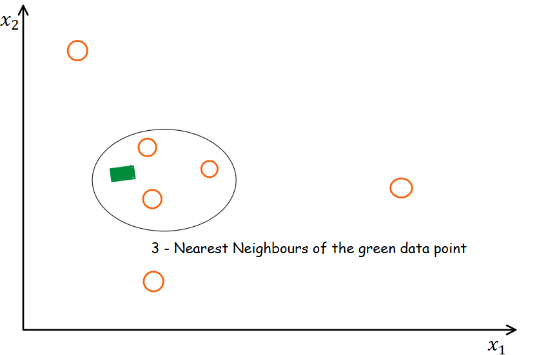

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 542 to 682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2712 non-null   int64  
 1   education        2643 non-null   float64
 2   sex              2712 non-null   object 
 3   is_smoking       2712 non-null   object 
 4   cigsPerDay       2695 non-null   float64
 5   BPMeds           2679 non-null   float64
 6   prevalentStroke  2712 non-null   int64  
 7   prevalentHyp     2712 non-null   int64  
 8   diabetes         2712 non-null   int64  
 9   totChol          2681 non-null   float64
 10  sysBP            2712 non-null   float64
 11  diaBP            2712 non-null   float64
 12  BMI              2701 non-null   float64
 13  heartRate        2711 non-null   float64
 14  glucose          2473 non-null   float64
 15  RISK             2712 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 360.2+ KB


In [ ]:
column_datatypes= train_df.drop("RISK",axis=1).dtypes
categorical_columns=list(column_datatypes[column_datatypes=="object"].index.values)
continous_columns=list(column_datatypes[(column_datatypes=="int64") | (column_datatypes=="float64") ].index.values)

In [ ]:
class Data_preprocessing:
  def __init__(self,train_data):
        self.train_data = train_data

  def missing_value_continous(self,columns_with_specific_type,neighbors=3):
    knn_imputer= KNNImputer(n_neighbors=neighbors)
    knn_imputer.fit(self.train_data[columns_with_specific_type])
    self.train_data[columns_with_specific_type]= knn_imputer.transform(self.train_data[columns_with_specific_type])
    return self.train_data

  def missing_value_categorical(self,columns_with_specific_type,imputation_type="most_frequent"):
   most_frequent= SimpleImputer(strategy="most_frequent")
   most_frequent.fit(self.train_data[columns_with_specific_type])
   self.train_data[columns_with_specific_type]= most_frequent.transform(self.train_data[columns_with_specific_type])
   return self.train_data

  def outlier_treatment(self,Q1,Q3,IQR,columns_with_outlier,action):
     ''' 
     Finding Outliers and Imputing them by mean/median to avoid loss of data
     '''
     if action=="median":
       for i in range(len(columns_with_outlier)):
         column_name= columns_with_outlier[i]
         meadian_outlier=np.median(self.train_data[column_name])
         self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]- (1.5*IQR[column_name])))| (self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))) )].index,column_name]=meadian_outlier

  
     if action== "mean":
       for i in range(len(columns_with_outlier)):
         column_name= columns_with_outlier[i]
         mean_outlier=np.mean(self.train_data[column_name])
         self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]- (1.5*IQR[column_name])))| (self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))) )].index,column_name]=mean_outlier
     return self.train_data


In [ ]:
dlist= [train_df,final_testX]
for df in dlist:
  #create class object
  dat= Data_preprocessing(df)
  df= dat.missing_value_continous(continous_columns)
  df= dat.missing_value_categorical(categorical_columns)

In [ ]:
print(train_df.isnull().sum())
print('-'*100)
print(final_testX.isnull().sum())

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
RISK               0
dtype: int64
----------------------------------------------------------------------------------------------------
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64


## **Handling Outliers**

## Outliers in train set

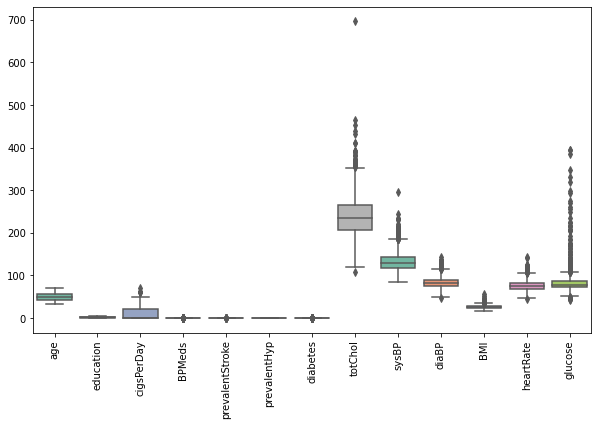

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax= sns.boxplot(data=train_df[continous_columns],orient='v',palette='Set2')

In [ ]:
train_outliers= ["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

## Outliers in test set

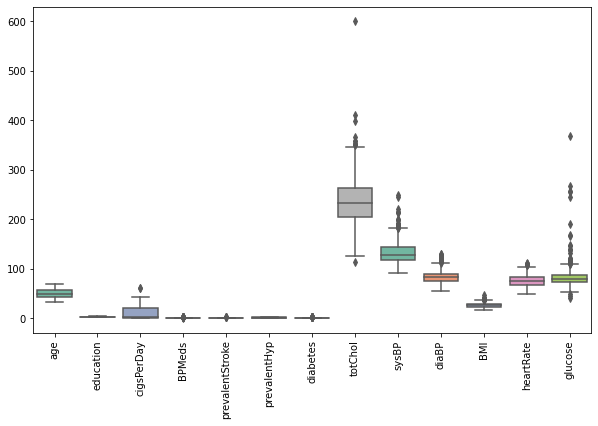

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax= sns.boxplot(data=final_testX[continous_columns],orient='v',palette='Set2')

In [ ]:
test_outliers=train_outliers

### both have same outlier columns

In [ ]:
#compute outlier treatment
ldf=[train_df,final_testX]
for df in ldf:
  dat= Data_preprocessing(df)
  Q1= df[continous_columns].quantile(0.25)
  Q3= df[continous_columns].quantile(0.75)
  IQR= (Q3-Q1)
  df= dat.outlier_treatment(Q1,Q3,IQR,train_outliers,"median")


##Treatment Done!

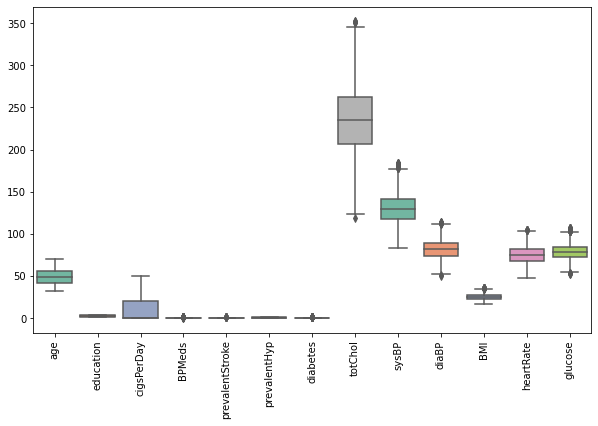

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax= sns.boxplot(data=train_df[continous_columns],orient='v',palette='Set2')

## **3. EDA on features to find some pattern using training data set**
---

###**AGE and Sex**

In [ ]:
train_df['sex'].unique()

array(['F', 'M'], dtype=object)

Text(0.5, 1.0, 'Male')

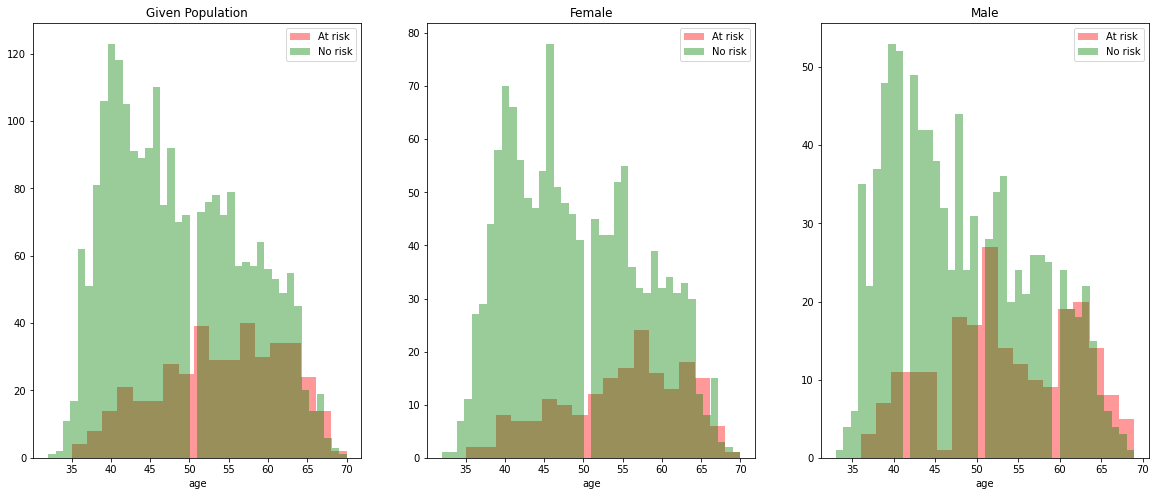

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(train_df[train_df['RISK']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(train_df[train_df['RISK']==0].age,bins=40,label=no_risk,ax=axes[0],color='g' ,kde=False)
ax.legend()
ax.set_title("Given Population")
women= train_df[train_df['sex']=="F"]
men= train_df[train_df['sex']=="M"]
ax= sns.distplot(women[women['RISK']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(women[women['RISK']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['RISK']==1].age,bins=18,label=at_risk,ax=axes[2],color='r',kde=False)
ax= sns.distplot(men[men['RISK']==0].age,bins=40,label=no_risk,ax=axes[2],color='g',kde=False)
ax.legend()
ax.set_title("Male")



##**INSIGHTS :**
From the above graphs we can say that:
1. Both Women and Men lying in Age group of 50-52 have high risk of heart disease.
2. Men lying in age group 40-42 are at risk.
3. Men having age more than 65 are also at risk.

## **Age and Smoking**

Text(0.5, 1.0, 'NonSmokers')

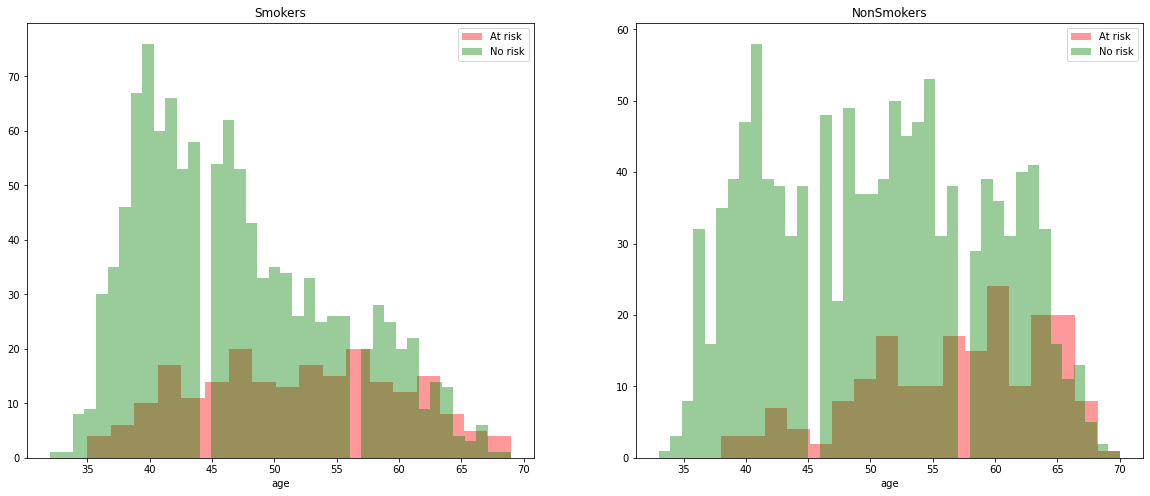

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
smoking= train_df[train_df['is_smoking']=="YES"]
non_smoking= train_df[train_df['is_smoking']=="NO"]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax= sns.distplot(smoking[train_df['RISK']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(smoking[train_df['RISK']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[train_df['RISK']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[train_df['RISK']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("NonSmokers")





##**INSIGHTS:**
Again we see Risk is High in same age group despite they are Smokers or not.

In [ ]:
train_df['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

##**Cigs(Cigerettes smoke by a Person per day) ,Sex,RISK**

In [ ]:
train_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'RISK'],
      dtype='object')

In [ ]:
train_df['cigsPerDay']=train_df['cigsPerDay'].astype(int)

In [ ]:
final_testX['cigsPerDay']=final_testX['cigsPerDay'].astype(int)

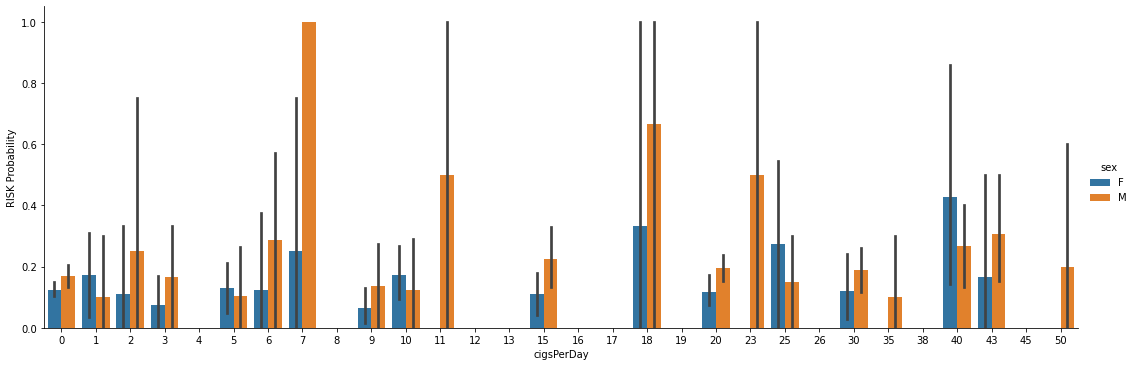

In [ ]:
g=sns.factorplot('cigsPerDay','RISK',kind='bar',
                    data=train_df,hue='sex',aspect=3)
g=g.set_ylabels("RISK Probability")

## **INSIGHTS:**
1. Both Male,Female who are non smoker or smoke less than 4 cigs per day have very low risk of Heart disease

2. All those men who smoke 7 cigs definitely got a heart disease.

### Converting following columns : **'BPMeds' ,'prevalentStroke', 'prevalentHyp', 'diabetes'** into categorical column

In [ ]:
ldf= [train_df,final_testX]
tocat=['BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
for df in ldf:
  for col in tocat:
    df[col]=df[col].astype('category')

## **Diabetes** 

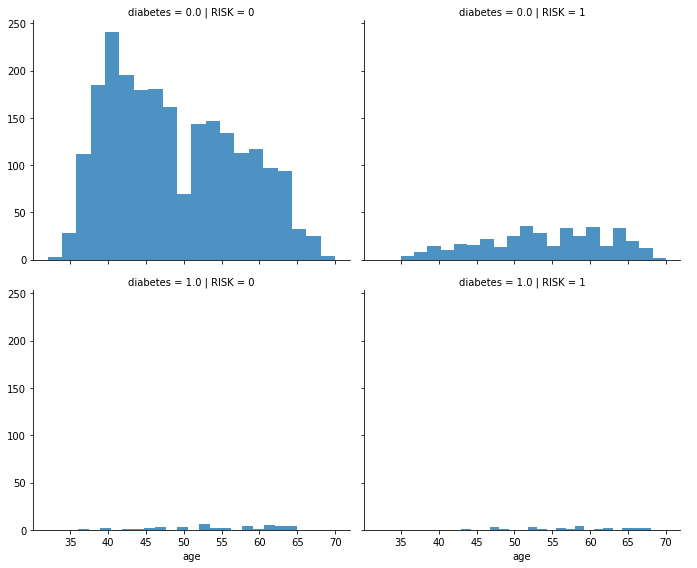

In [ ]:
grid= sns.FacetGrid(train_df,col='RISK',row='diabetes',size=4,aspect=1.2,palette='viridis')
grid.map(plt.hist,'age',alpha=.8,bins=20)
grid.add_legend();

##**INSIGHTS:**
In general People who don't have diabetes also don't have Heart disease.

##**Numerical Variables VS Risk**

In [ ]:
numerical_col=continous_columns[7:]
print(numerical_col)

['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


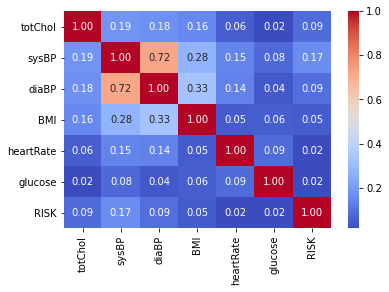

In [ ]:
#correlation matrix between numerical variables and RISK of getting heart disease
numerical_col.append('RISK')
g= sns.heatmap(train_df[numerical_col].corr(),annot=True,fmt='.2f',cmap='coolwarm')


"diaBP" and "sysBP" are highly correlated
1. diaBP is Diastolic Pressure
2. sysBP is Systolic Pressure

We generally while measuring our BP look for there Ratio 
e.g a healthy person has 120/80 

##Deriving new feature **AvgBP** = **sysBP+diaBP/2** and dropping diaBP


In [ ]:
X_df=train_df.copy()
Xt_df=final_testX.copy()

In [ ]:
ldf=[train_df,final_testX]
for df in ldf:
  df['bp_ratio']= round(df["sysBP"]/df["diaBP"],2)
  df["avgBP"]= round((df["sysBP"]+df["diaBP"])/2,2)
  df.drop("diaBP",axis=1,inplace=True)
  df.drop("sysBP",axis=1,inplace=True)
  

In [ ]:
numerical_col=['RISK','totChol', 'bp_ratio','avgBP', 'BMI', 'heartRate', 'glucose']

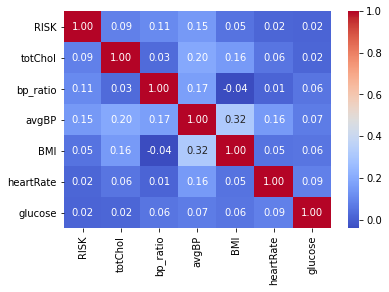

In [ ]:
#correlation matrix between numerical variables and RISK of getting heart disease
g= sns.heatmap(train_df[numerical_col].corr(),annot=True,fmt='.2f',cmap='coolwarm')


Apparently there is no direct linear relationship between the numerical features and Risk of getting heart disease.

## Checking for **'prevalentStroke'** and **'prevalentHyp'** cases with respect to Risk of getting disease.

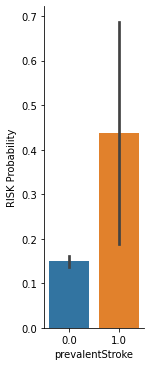

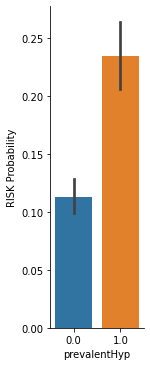

In [ ]:
ax=sns.factorplot('prevalentStroke','RISK',kind='bar',
                    data=train_df,size=5,aspect=0.4)
ax=ax.set_ylabels("RISK Probability")
ax=sns.factorplot('prevalentHyp','RISK',kind='bar',
                    data=train_df,size=5,aspect=0.4)
ax=ax.set_ylabels("RISK Probability")

## **INSIGHTS:** 
People who had earlier got a stroke and Hypertension have  high chance of getting the heart disease.

## lets check how this Feature **Education** is related with heart disease

Text(0.5, 1.0, 'Education')

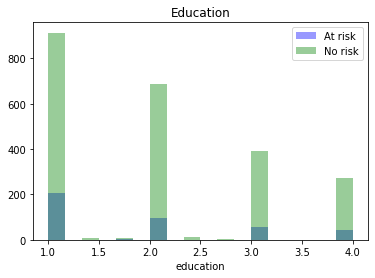

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
ax=sns.distplot(train_df[train_df['RISK']==1].education,bins=18,label=at_risk,color='b',kde=False)
ax=sns.distplot(train_df[train_df['RISK']==0].education,bins=18,label=no_risk,color='g',kde=False)
ax.legend()
ax.set_title('Education')


## **InSIGHTS** 
Not much we can intrepret but we can say people with lower education level are at higher risk of getting heart disease

##**4. Feature Engineering**
---

##**AGE**
*  From the above EDA we try to establish some patterns which influence the cause of heart disease in that we found people both men and women lying in a particular age group **40-42, 50-51** are more prone to heart disease.

* So what I want to try is to create age buckets of population e.g 18-25 -> **20s**, 25-40 -> **Mid30s**
etc in this way we can target the particular age group which have high risk of Heart disease.


In [ ]:
train_df.age.describe()

count    2712.000000
mean       49.580015
std         8.585428
min        32.000000
25%        42.000000
50%        49.000000
75%        56.250000
max        70.000000
Name: age, dtype: float64

In [ ]:
ldf=[train_df,final_testX]
for df in ldf:
  df['Age_Bucket']=pd.cut(df.age,bins=10,labels=['Early30','Mid30','Early40','Mid40','late40',
                                               'Early50','Mid50','late50','Mid60','late60'])

In [ ]:
ldf=[train_df,final_testX]
for df in ldf:
  print(df["Age_Bucket"].value_counts())
  print('-'*100)

Early40    475
Mid40      407
late40     365
Mid50      320
Mid30      315
late50     286
Early50    275
Mid60      192
late60      45
Early30     32
Name: Age_Bucket, dtype: int64
----------------------------------------------------------------------------------------------------
Mid40      107
late40     102
Mid30       96
Mid50       80
Early40     74
Early50     64
Mid60       59
late50      55
Early30     28
late60      13
Name: Age_Bucket, dtype: int64
----------------------------------------------------------------------------------------------------


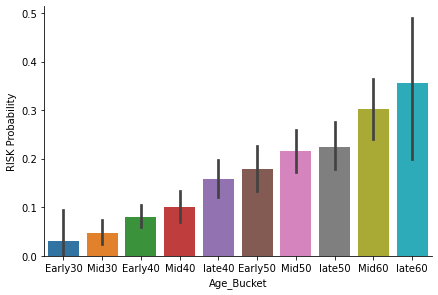

In [ ]:
ax=sns.factorplot('Age_Bucket','RISK',kind='bar',
                    data=train_df,size=4,aspect=1.5)
ax=ax.set_ylabels("RISK Probability")

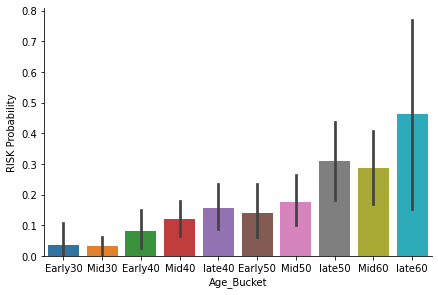

In [ ]:
ax=sns.factorplot('Age_Bucket',final_testY,kind='bar',
                    data=final_testX,size=4,aspect=1.5)
ax=ax.set_ylabels("RISK Probability")

## **INSIGHTS**
Now we are seeing some good info both on training and testing data, **as the age of person increase risk of getting Heart Disease Increases**

##**BP Bucket**
Just out of a common thought a lot many people told highBP leads to high disease lets check

In [ ]:
ldf=[train_df,final_testX]
for df in ldf:
  df['BP_Bucket']= pd.cut(df.avgBP,bins=5,labels=['Very_Low_BP','lowBP','healthyBP','HighBP','Very_high_BP'])

In [ ]:
train_df['BP_Bucket'].value_counts()

healthyBP       1141
lowBP            827
HighBP           524
Very_high_BP     129
Very_Low_BP       91
Name: BP_Bucket, dtype: int64

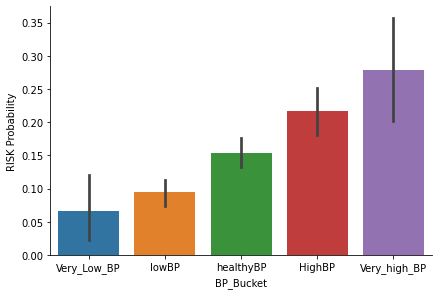

In [ ]:
ax=sns.factorplot('BP_Bucket','RISK',kind='bar',
                    data=train_df,size=4,aspect=1.5)
ax=ax.set_ylabels("RISK Probability")

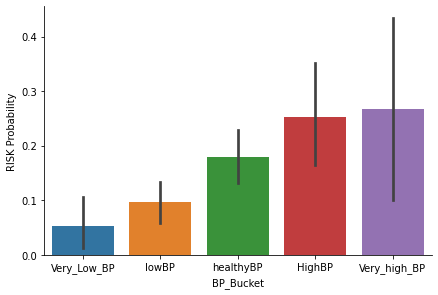

In [ ]:
ax=sns.factorplot('BP_Bucket',final_testY,kind='bar',
                    data=final_testX,size=4,aspect=1.5)
ax=ax.set_ylabels("RISK Probability")

In [ ]:
df=train_df.copy()
fdf=final_testX.copy()

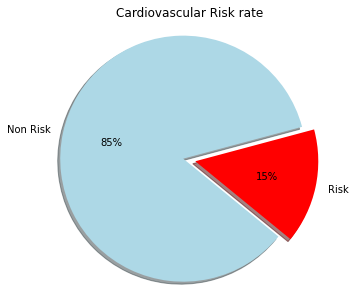

In [ ]:
labels = 'Non Risk',"Risk"
my_colors = ['lightblue','red']
my_explode = (0,0.1)
plt.figure(figsize=(6,5))
plt.pie(train_df['RISK'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()



##**5.Class Imbalanced issue and Evaluation-metric to be chosen**
---
### In this problem we have a dataset of patients where we have to find out whether the given features or symptom a person has he/she has a Cardiovascular disease in future.

But here’s the catch… the risk rate is relatively rare, only 15% of the people have this disease.








Well, let's guess what? We created a ML model and our “solution” would have 94% accuracy!

Unfortunately, that accuracy is misleading.

* All those non-risk cases, we’d have 100% accuracy.
* Those cases in which a person has a risk, we’d have 0% accuracy.
* Our overall accuracy would be high simply because the most cases are not getting the disease.

This is clearly a problem because many machine learning algorithms are designed to maximize overall accuracy.

## The Metric Trap

One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.



## For the given binary classification problem **Recall** of the ML model should be very high.
The False Negative or TypeII error should be zero

##**6.Model Trainning**
---

**Preprocessing**

Encoding the binary categorical features

In [ ]:
[{col:train_df[col].unique()} for col in categorical_columns]

[{'sex': array(['F', 'M'], dtype=object)},
 {'is_smoking': array(['YES', 'NO'], dtype=object)}]

In [ ]:
def preprocess_inputs(df):
  df=df.copy()
  #binary encoding
  df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
  df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

  #Extract numerical features
  num_df= df.select_dtypes(include=['int8','int32','int64','float64'])

  #Extract categorical features
  cat_df= df.select_dtypes(include=['category','object'])

  #One hot encode categorical variables
  features_cat= pd.get_dummies(cat_df,drop_first=True)

  #concat the features
  df= pd.concat([num_df,features_cat],axis=1)
  
  return df

In [ ]:
train_data= preprocess_inputs(train_df)
test_data= preprocess_inputs(final_testX)

In [ ]:
train_data.head()

,age,education,sex,is_smoking,cigsPerDay,totChol,BMI,heartRate,glucose,RISK,bp_ratio,avgBP,BPMeds_0.3333333333333333,BPMeds_0.6666666666666666,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0,Age_Bucket_Mid30,Age_Bucket_Early40,Age_Bucket_Mid40,Age_Bucket_late40,Age_Bucket_Early50,Age_Bucket_Mid50,Age_Bucket_late50,Age_Bucket_Mid60,Age_Bucket_late60,BP_Bucket_lowBP,BP_Bucket_healthyBP,BP_Bucket_HighBP,BP_Bucket_Very_high_BP
542,49.0,2.0,0,1,20,229.0,21.42,76.0,72.333333,0,1.55,97.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2726,51.0,3.0,1,0,0,215.0,28.59,65.0,100.000000,0,1.53,121.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3067,57.0,1.0,0,1,1,254.0,25.38,72.0,85.000000,1,1.81,113.75,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
204,59.0,4.0,0,0,0,282.0,28.96,72.0,85.666667,0,1.55,111.00,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
329,52.0,1.0,0,0,0,275.0,25.68,80.0,82.000000,0,1.58,91.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


##**Data Ready to be feeden**

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
#Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Evaluation metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
import sklearn.metrics as metrics

# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
#Features and Target
X= train_data.drop('RISK',axis=1)
y=train_data['RISK']

In [ ]:
#splitting into train test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [ ]:
print(X_train.shape[0],X_test.shape[0])

2169 543


In [ ]:
#scaling both Train ,test and validation sets
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
test_data=sc_X.fit_transform(test_data)

In [ ]:
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train,y_train)

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2169
Resampled dataset shape 3684


In [ ]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(x_smote,y_smote)
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.304
              precision    recall  f1-score   support

           0       0.93      0.20      0.32       461
           1       0.17      0.91      0.28        82

    accuracy                           0.30       543
   macro avg       0.55      0.55      0.30       543
weighted avg       0.81      0.30      0.32       543

